## Project - Featurization, Model Selection & Tuning

Submitted by: Dr. Shrishail S. Gajbhar as part of the "Featurization, Model Selection & Tuning" module project evaluation.

## Dataset Information:
* **Name: concrete.csv**
* **Domain: Cement Manufacturing**

## Aim: Predicting concrete compressive strength given specifications of the age and other ingredients of the mixture.


## Learning Outcomes:
* Exploratory Data Analysis
* Building ML models for regression
* Hyper parameter tuning

## About the dataset, column attributes (independent variables) and target variable (dependent variable)

The data is related to cement manufacturing industry where actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations). Note that- **The concrete compressive strength is a highly nonlinear function of age and ingredients**. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

**Attribute Information**:
* Cement : measured in kg in a m3 mixture
* Blast : measured in kg in a m3 mixture
* Fly ash : measured in kg in a m3 mixture
* Water : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Aggregate : measured in kg in a m3 mixture
* Age : day (1~365)
* Strength: Concrete compressive strength measured in MPa (**Target Attribute**)

**There are total 9 attributes in the dataset and in the context of the given problem, the target (or dependent) attribute is "strength" whereas the remaining are independent attributes.**

### 1) Importing Necessary Libraries

In [1]:
import pandas as pd # importing Pandas library for performing dataframe related operations
import numpy as np  # importing numpy for performing numeric array related operations
import matplotlib.pyplot as plt # importing matplotlib.pyplot for basic plotting operations
import seaborn as sns  # importing seaborn for advanced data visualization
# Below is the magic function to display and save graphs/figures in the output cells
%matplotlib inline   
from sklearn.model_selection import train_test_split # For train-test split
# For standardizing/normalizing the data (let's import many and see which suits the best)
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing import PolynomialFeatures # To create polynomial features
import warnings # Import warnings module
warnings.filterwarnings('ignore') # Ignore the warnings
from sklearn.feature_selection import f_regression,SelectKBest,mutual_info_regression,RFE # For feature selection
# Let's import the various supervised ML models
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.neighbors import KNeighborsRegressor # K-NN Regressor Model
from sklearn.svm import SVR # Support vector regressor
from sklearn.tree import DecisionTreeRegressor # Decision tree regressor
# Let's import the ensemble regressor models
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline # Import sklearn pipeline
from sklearn.model_selection import cross_val_score, KFold # Cross validation
from sklearn.metrics import explained_variance_score # Metric used to evaluate the regression models
from scipy.stats import zscore # zscore normalization from scipy.stats
from sklearn.utils import resample # Used to find the bootstrapping confidence interval

### 2) Reading the dataset as dataframe

In [2]:
df_orig = pd.read_csv('concrete.csv')
# Creating a copy of the original dataframe
df = df_orig.copy()

### Let us take a look at the raw dataset

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


**By observing the first five rows, one can see that all attributes are numeric in nature**

In [4]:
# Let's see shape of the dataset
df.shape

(1030, 9)

**There are 1030 observations and 9 column attributes in the dataset**

In [5]:
# Let's see datatypes of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Except age attribute, the data type of remaining attributes is float since they indicate measurement values of physical variables. Datatype of age attribute is integer as per the expectation. Dataset seems to have no missing values.

## 1. Deliverable -1 (Exploratory data quality report )

### 1.a. Univariate analysis

**Goal: Explaining data types and description of the independent attributes which should include**
* name
* meaning 
* range of values observed 
* central values (mean and median) 
* standard deviation and quartiles 
* analysis of the body of distributions / tails 
* missing values, outliers

In [6]:
# Let's see the names of the independent columns
for col in df.columns:
    if col!='strength': # Print all column names except target column
        print(col)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age


Meaning of each attribute name:
* cement: it indicates amount of cement quantity measured in kg (kilogram) in a m3 mixture 
* slag: it indicates amount of blast furnace slag quantity measured in kg (kilogram) in a m3 mixture
* ash: it indicates amount of fly ash measured in kg in a m3 mixture
* water : it indicates amount of water quantity measured in kg in a m3 mixture
* superplastic : it indicates amount of superplasticizer quantity measured in kg in a m3 mixture
* coarseagg : it indicates amount of coarse aggregate measured in kg in a m3 mixture
* fineagg : it indicates amount of fine aggregate quantity measured in kg in a m3 mixture
* age : it indicates age of the concrete mixure measured days (1~365)

All the independent column names are appropriate as per their description.

In [7]:
# Let's see the five point summary of the columns
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Observations: 
* cement: the range of this attribute is 102 (min) to 540 (max). The mean (281.16) and median (272.90) values differ slightly. The standard deviation value is quite high (104.50). For 75% of the given observations, this value is less than 350 (3rd quartile).
* slag: the range of this attribute is 0 (min) to 359.40 (max). The mean (73.89) and median (22) values differ significantly indicating skewness of the distribution. The standard deviation value is 86.27. For 25% of the given observations, this value is 0..! (1st quartile).
* ash: the range of this attribute is 0 (min) to 200 (max). Difference between the mean (54.18) and median (0) values is very high. The standard deviation value (64) is also high. For 50% of the given observations, this value is 0..! (2nd quartile). This attribute seems to have highly skewed distribution.
* water: the range of this attribute is 121.8 (min) to 247 (max). The mean (181.56) and median (185) values differ slightly. The standard deviation value is 21.35. For 75% of the given observations, this value is 192 (3rd quartile). This attribute seems to have normal distribution.
* superplastic: the range of this attribute is 0 (min) to 32.20 (max). Difference between the mean (620) and median (6.40) values is negligible. The standard deviation value is almost 6. For 25% of the given observations, this value is 0..! (1st quartile). 
* coarseagg: the range of this attribute is 801 (min) to 1145 (max). The mean (aprox. 973) and median (968) values differ slightly. The standard deviation value is 77.75. For 75% of the given observations, this value is 1029 (3rd quartile). 
* fineagg: the range of this attribute is 594 (min) to 992 (max). The mean (aprox. 773) and median (779) values differ slightly. The standard deviation value is 80.17. For 25% of the given observations, this value is 731 (1st quartile).
* age: the range of this attribute is 1 (min) to 365 (max) days. The mean (approx. 46) and median (28) values differ significantly. The standard deviation value is approx 63 which is quite high. For 75% of the given observations, this value is 56 days (3rd quartile). This attribute seems to have skewed distribution.

In [8]:
# Let us check the missing values..
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**The dataset do not have any missing values.**

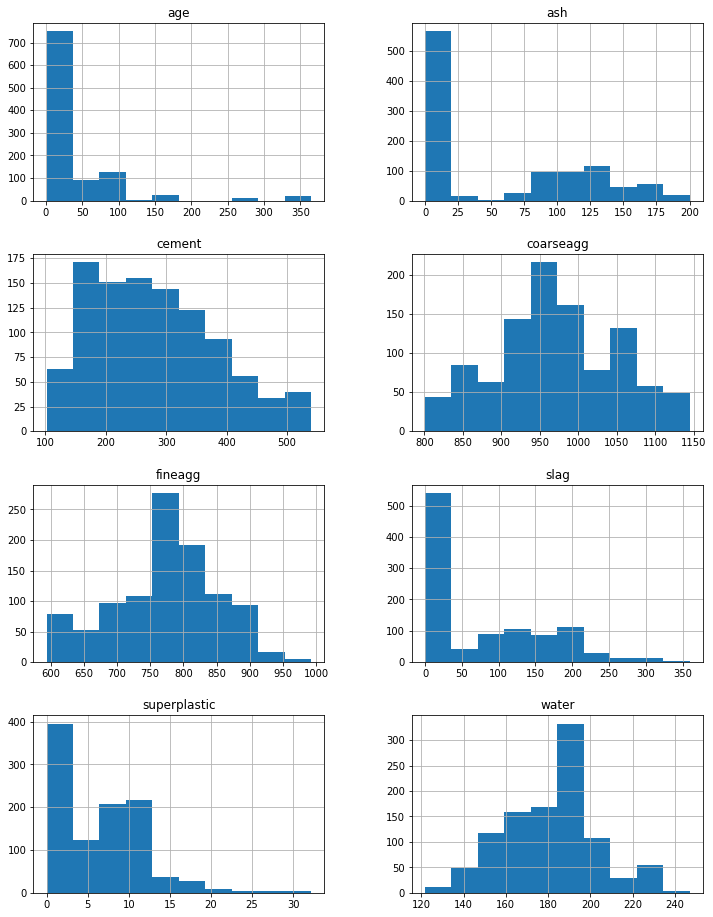

In [9]:
# Let's us only plot the distributions of independent attributes
df.drop('strength',axis=1).hist(figsize=(12,16),layout=(4,2));

Observations:
* Disributions of attributes namely age, ash, slag and superplastic show high skewness
* Disribution of cement attribute shows moderate skewness
* Distributions of coarseagg, fineagg and water look normally distributed

In [10]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

age             3.269177
superplastic    0.907203
slag            0.800717
ash             0.537354
cement          0.509481
strength        0.416977
water           0.074628
coarseagg      -0.040220
fineagg        -0.253010
dtype: float64

Observations:
* Distribition of most of the columns show positive skewness (long right tail)
* The skewness values show agreement with our qualitative analysis of the distribution plot shown above
* Water and coarseag have approximately symmetric distributions
* Attributes coarseagg and fineagg show negative skewness

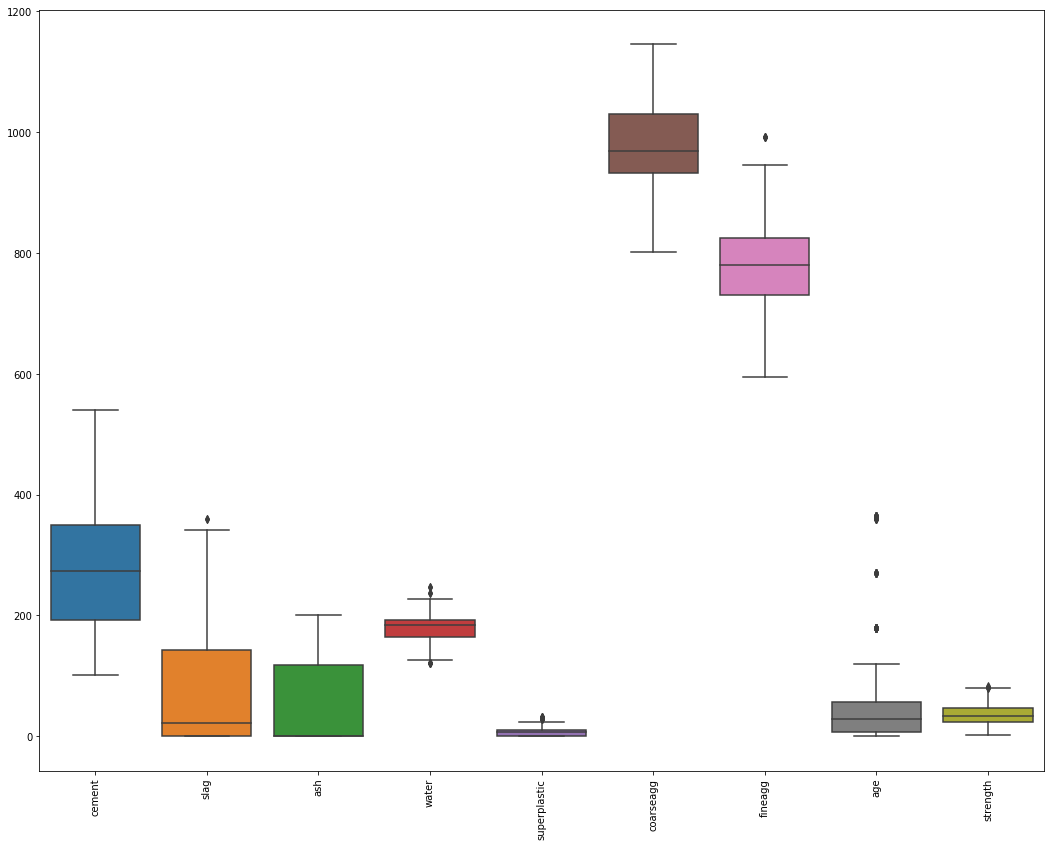

In [11]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

Observations:
* One can see that, box-plots of independent attributes namely slag, water, superplastic, fineagg and age show outliers
* Target attribute i.e., strength also has outliers
* water attribute shows presence of outliers on both sides of the whiskers
* Box plot of age attribute shows high amount of outliers

### 1.b. Multivariate analysis

**Goal: To perform bi-variate analysis between the predictor variables and between the predictor variables and target column which should include**
* finding the relationship and degree of relation between independent variables and between independent variables and target variable
* Visualization using boxplots, pair plots, histograms or density curves
* Selecting the most appropriate attributes

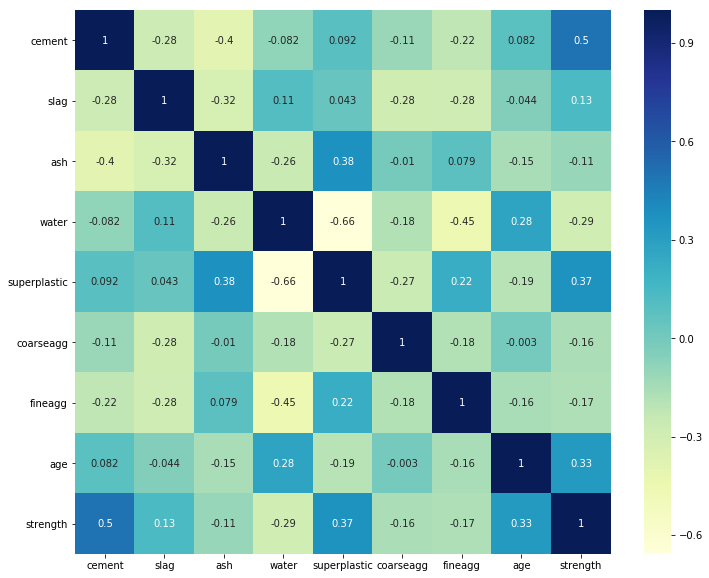

In [12]:
# Let us see how many of them are correlated..
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

**Observations:**
* Target attribute strength is moderately correlated (positive) to cement and to some level superplastic and age. It is  slightly correlated with slag.
* Target attribute is slightly negatively correlated with ash, fineagg and coarseagg. It is negatively correlated with water to some extent.

In [13]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.drop('strength',axis=1).corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation
superplastic,water,0.657533
fineagg,water,0.450661
cement,ash,0.397467
ash,superplastic,0.377503
slag,ash,0.323580


**Observations:** Assuming correlation values > 0.3 to be significant among the independent variables, one can observe that
* superplastic and water are strongly correlated
* fineagg and water are moderately correlated
* cement and ash, ash and superplastic, slag and ash are also correlated to some extent.

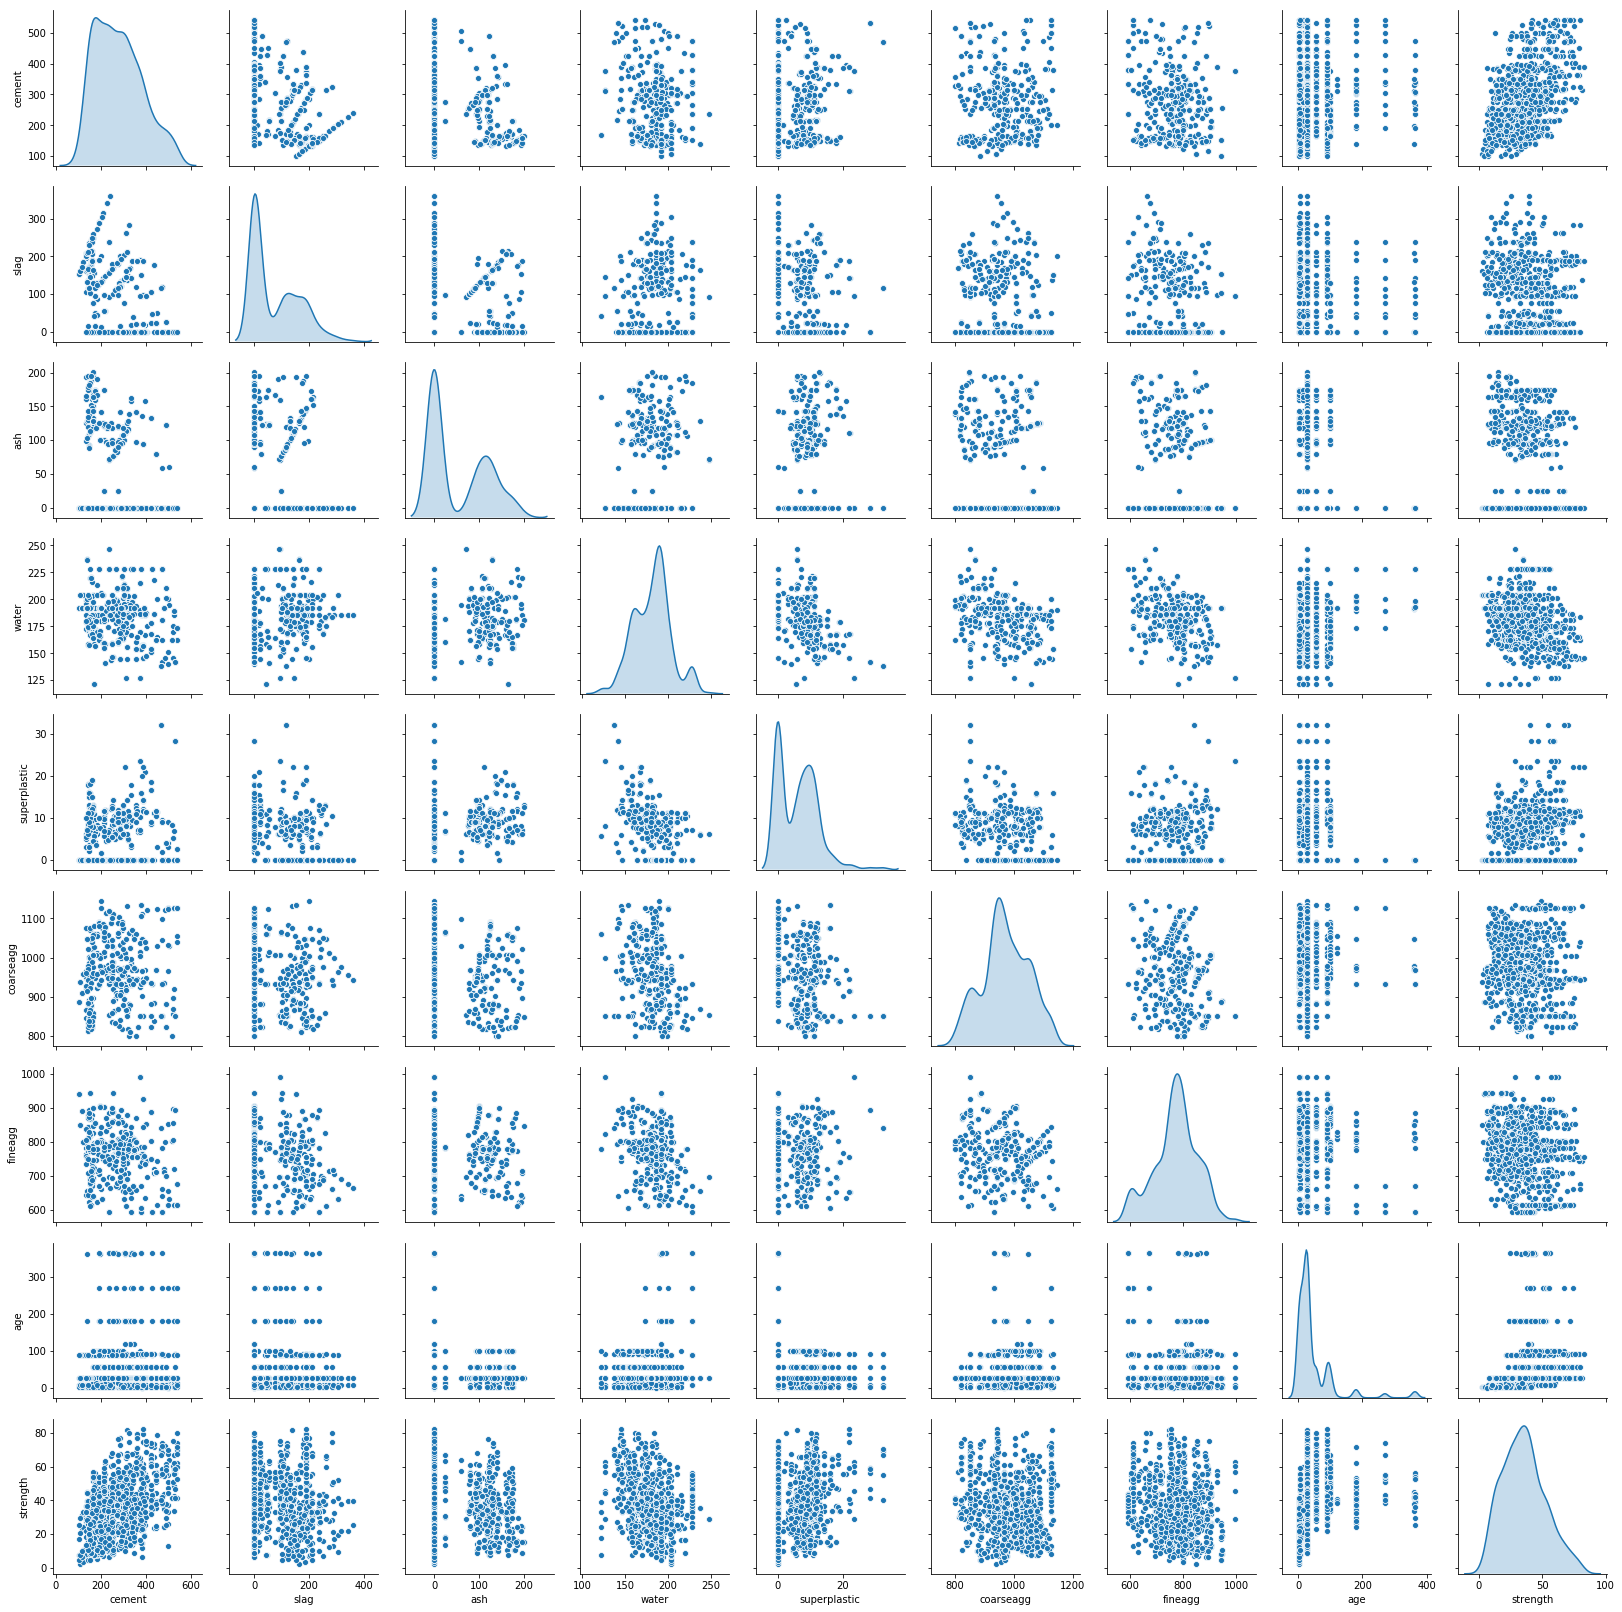

In [14]:
sns.pairplot(df,diag_kind='kde');

**Observations:**
* Target attribute strength do not show any kind of relationship with other independent attributes except cement and superplastic. Attributes cement and superplastic seem to have linear relationship with target attribute.
* Attribute water seems to be negatively related with strength 
* Attribute age do not show any relation with other independent attributes. Slightly non-linear relation can be observed between age and strength
* fineagg and coarseagg shows slight negative linear relationship with water
* superplastic attribute has negative correlation with the water. 
* Except for strength and cement attributes, density curves for most of the attribute show multiple peaks

### 1.c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

**Since there are no missing values in the dataset, no missing value imputation is necessary.** (please refer univariate analysis section)

**By refering to the boxplot shown in the univariate analysis section, one can oberve that**
* box-plots of attributes namely slag, ash, superplastic, fineagg, age and strength show presence of outliers above third quartile only.
* water attribute has presence of outliers both below the first quartile as well as above the third quartile

**Strategy to remove outliers:** We choose to replace attribute outlier values by their respective medians.

In [15]:
# let us remove the outliers
for column in df.columns.tolist():
    Q1 = df[column].quantile(.25) # 1st quartile
    Q3 = df[column].quantile(.75) # 3rd quartile
    IQR = Q3-Q1 # get inter quartile range
    # Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
    df[column].replace(df.loc[(df[column] > Q3+1.5*IQR)|(df[column] < Q1-1.5*IQR), column], df[column].median(),inplace=True)

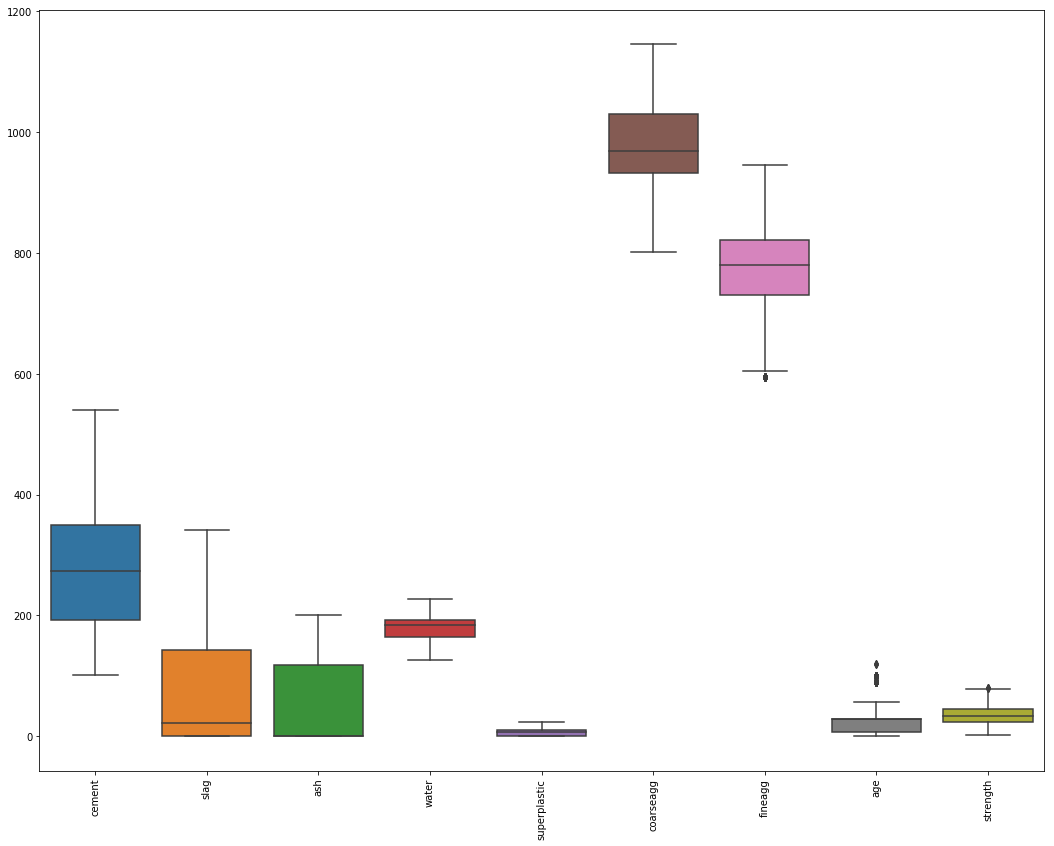

In [16]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

**Observations after outlier removal:**
* Outliers are completely removed from slag, water, superplastic attributes
* New outliers below first quartile are created in fineagg column. However, we are not going to treat them again.
* Age attribute still shows some outliers
* Outliers in the strength column are not removed completely.

## 2. Deliverable -2 (Feature Engineering techniques)
* 2.a. Identify opportunities (if any) to create a composite feature, drop a feature
* 2.b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
* 2.c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

### 2.a Identify opportunities (if any) to create a composite feature, drop a feature

In this problem, we do have an opportunity to add a composite feature which is highly useful to predict the concrete strength in MPa (Mega Pascal) namely **water-cement ratio**. (Ref: https://en.wikipedia.org/wiki/Water%E2%80%93cement_ratio )

There is a non-linear relationship between water-cement ratio and concrete strenth. Smaller values of water-cement ratio (W/C) are associated with higher values of concrete strength where as higher values of ratio provide small concrete strength.

In [17]:
# Let's add this new composite feature before target attribute.
df.insert(8,'water/cement',df['water']/df['cement'])
# Let's check whether the feature is added properly or not?
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [18]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.238698,-0.031962,-0.884607,0.493518
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.282383,-0.028971,0.356693,0.129561
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.091729,0.057928,0.253751,-0.097973
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.426299,-0.040304,0.325203,-0.300043
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.156591,0.062013,-0.181558,0.342633
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.161377,0.018078,-0.022338,-0.173234
fineagg,-0.238698,-0.282383,0.091729,-0.426299,0.156591,-0.161377,1.000000,0.051532,0.090906,-0.176113
age,-0.031962,-0.028971,0.057928,-0.040304,0.062013,0.018078,0.051532,1.000000,-0.000438,0.499711
water/cement,-0.884607,0.356693,0.253751,0.325203,-0.181558,-0.022338,0.090906,-0.000438,1.000000,-0.501616
strength,0.493518,0.129561,-0.097973,-0.300043,0.342633,-0.173234,-0.176113,0.499711,-0.501616,1.000000


One can see that, the newly added feature is moderately correlated (negatively) with target attribute 

**Dropping a feature: We won't drop any feature for the time being, however after feature engineering stage, we may choose to drop some features to avoid overfitting** 

### 2.b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and ingredients. Thus using a simple linear model won't help in this problem to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes

In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features with degree 3.

In [19]:
poly3 = PolynomialFeatures(degree = 3, interaction_only=True)
poly3_ft = poly3.fit_transform(df.drop('strength',axis=1))
df_poly3= pd.DataFrame(poly3_ft,columns=['feat_'+str(x) for x in range(poly3_ft.shape[1])])
df_poly3.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [20]:
# Let us create the dataframe with all features
df_feat = df.drop('strength',axis=1).join(df_poly3)
df_feat['strength'] = df['strength']
print(df_feat.shape)
df_feat.head()

(1030, 140)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


**The newly created dataframe with features contains 139 independent and 1 target attribute. Since, all the features will not be useful, we apply LASSO regularization step and select the most relevant features. This will also reduce the problem of overfitting models.**

In [21]:
from sklearn.linear_model import Lasso
X = df_feat.drop('strength',axis=1)
y = df_feat['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso() # Since it uses L1 reglarization features with zero coefficients will be insignificant.
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
# Let's us get the features selected by Lasso
lasso_feat = X_train.columns[lasso.coef_!=0].tolist() # Dropping the features with 0 coefficient value
print(lasso_feat) # Features selected using LASSO regularization
print("Out of total {} independent features, number of features selected by LASSO regularization are {} ".format(X_train.shape[1],len(lasso_feat)))
df_feat = df_feat[lasso_feat] # Select independent features 
df_feat['strength'] = df_orig['strength'] # Append target attribute at the end.
df_feat.head()

Lasso model: [ 0.00000000e+00 -1.17288391e-01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  6.42007678e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.29096472e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.91596932e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -3.53052004e-04
 -4.48599402e-05 -1.65129796e-04 -3.41587966e-03  1.38891239e-04
 -4.87299626e-05  7.85355877e-04  0.00000000e+00  1.82615355e-03
  2.17037842e-04  8.68128721e-03 -1.18988761e-06  2.14312449e-05
  3.50851587e-04  0.00000000e+00 -3.56979642e-04 -2.69427205e-04
  5.42885760e-05  7.76458228e-05 -1.16337159e-03  0.00000000e+00
  1.00916513e-02 -1.33716827e-04  2.78662163e-04 -3.93271288e-04
 -0.00000000e+00 -5.76609266e-04 -1.76868943e-03  6.26389618e-03
 -0.00000000e+00  2.96192786e-05  1.45686046e-04 -2.22935437e-02
 -2.61905682e-05 -5.21402027e-03  0.00000000e+00  1.29370016e-06
  3.83779506e-07  1.60995003e-05 -5.51248545e-07  8.85613789e-07
 -2.12059050

,slag,coarseagg,feat_2,feat_6,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,212.0,971.8,212.0,971.8,29955.60,0.00,28754.55,0.00,137315.34,105763.05,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,42.2,1080.8,42.2,1080.8,7127.58,20994.27,26736.87,1824.12,182547.12,134478.18,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,0.0,956.9,0.0,956.9,0.00,23925.00,46850.00,1375.00,239225.00,215300.00,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,114.0,932.0,114.0,932.0,30324.00,0.00,60648.00,0.00,247912.00,178220.00,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,183.4,1047.4,183.4,1047.4,28390.32,0.00,29922.84,1408.68,162137.52,107849.16,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


### 2.c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [45]:
from sklearn.cluster import KMeans
df_z = df_orig.apply(zscore) # Get the normalized dataframe
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:14]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7586.369824
2,3,6368.781536
3,4,5534.901228
4,5,4812.686939
5,6,4352.205362
6,7,4046.872851
7,8,3851.533274
8,9,3598.040083
9,10,3420.818441


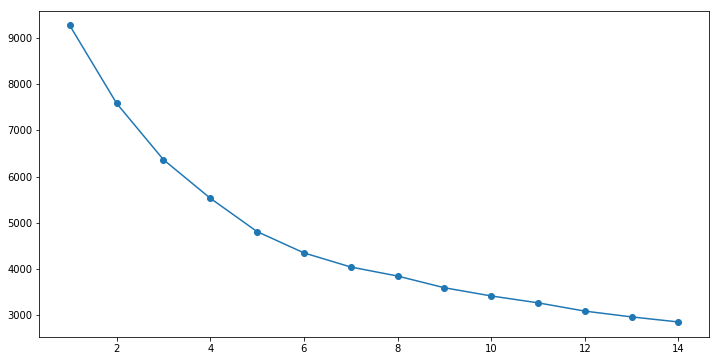

In [46]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [50]:
kmeans = KMeans(n_clusters= 7)
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[156 185  69 169 129 277  45]


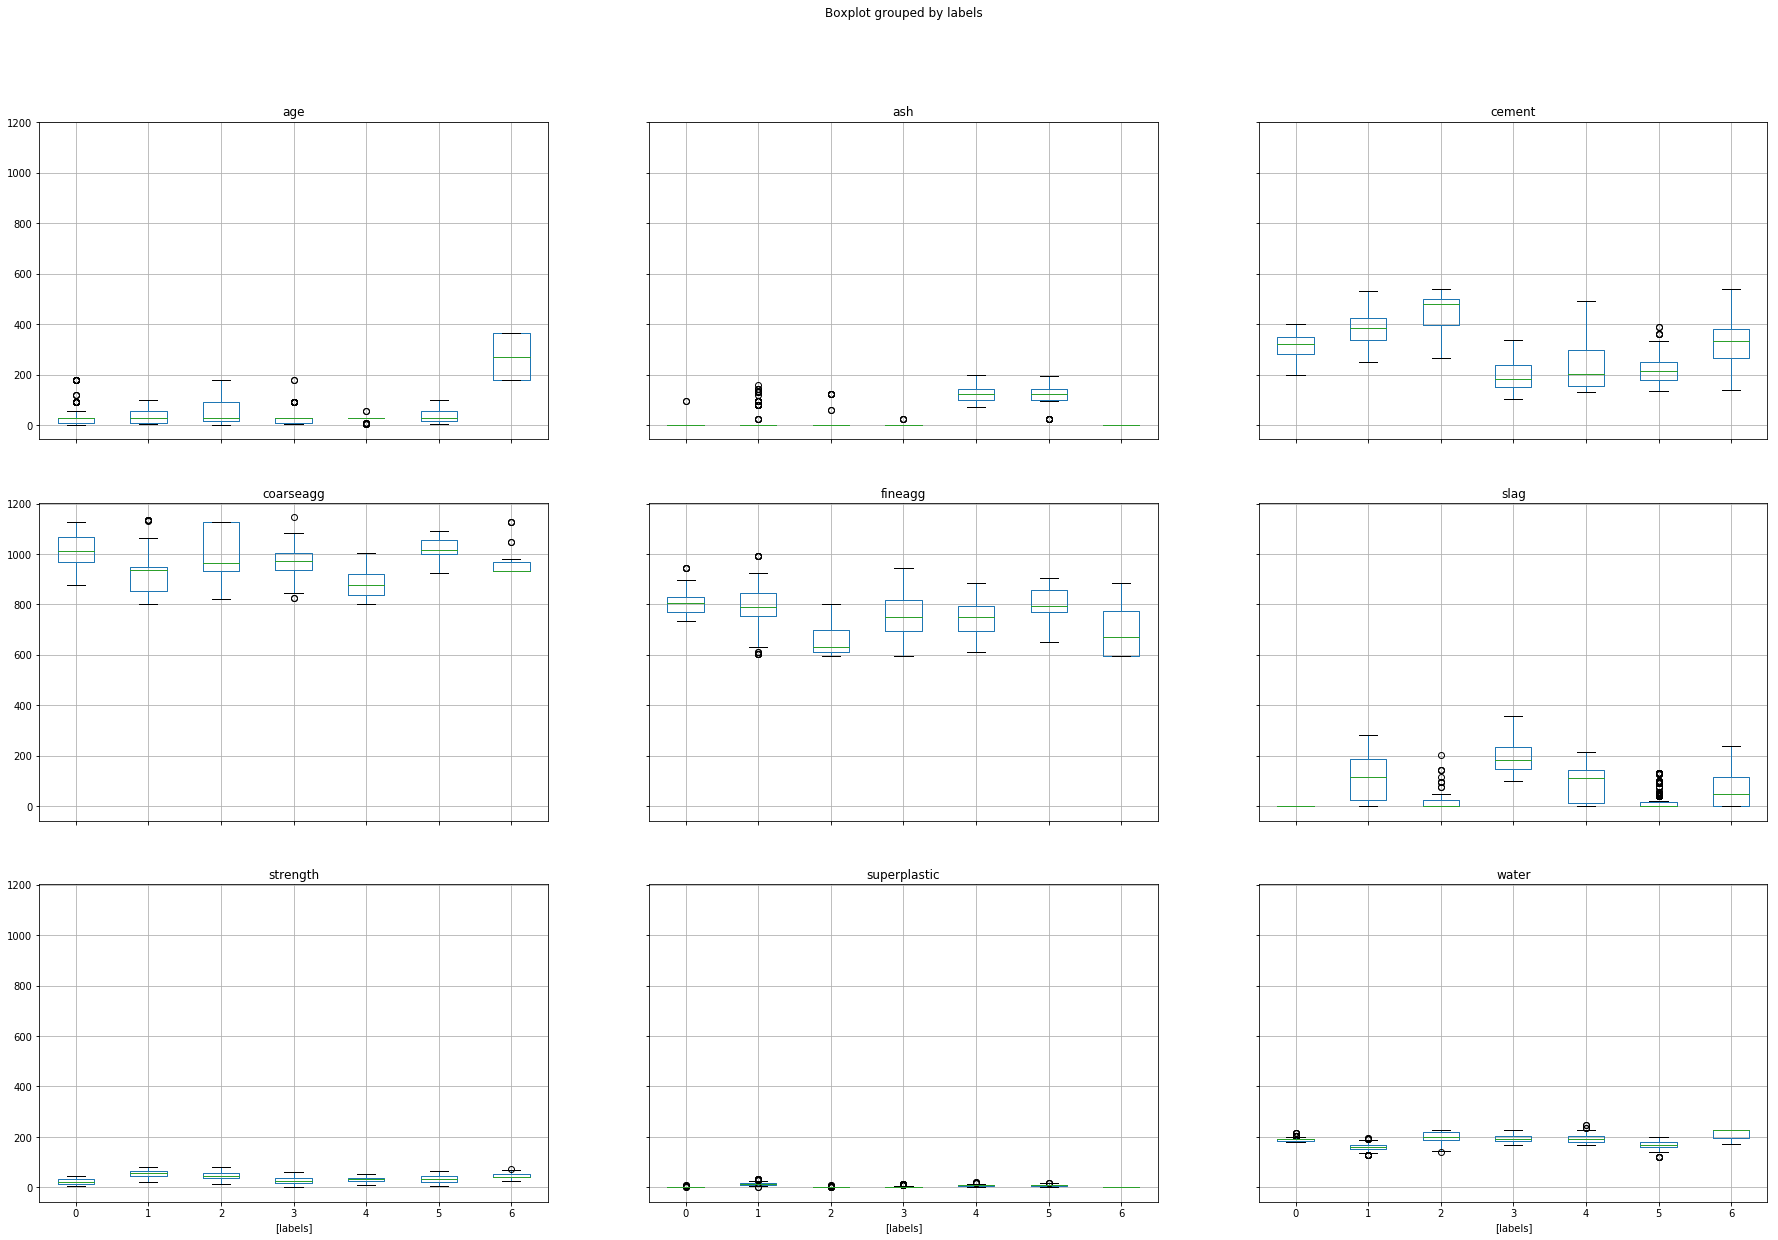

In [53]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
df_labeled = df_orig.join(cluster_labels)
df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20));

**No distinct clusters are visible at any number of clusters. Looks like the attributes are weak predictors except for cement. The potential of getting better results by breaking data into clusters is unlikely to give the desired result.**

## 3. Deliverable -3 (create the model )

### 3.a. Obtain feature importance for the individual features and present your findings

In this section we test and compare predictive performance of various ML Models using the amount of explained variance (in percentage) as an evaluation metric. ML Models used for comparison are:
* Linear Regression
* K-NN Regressor
* SVR
* Decision Tree Regressor
* Adaboost Regressor
* Random Forest Regressor
* Bagging Regressor
* Gradient Boost Regressor

#### In this section, we first examine the effect of step 2.a (creating composite feature, droping a feature) on the model accuracy and will decide which dataframe to use in the final analysis

We will use df_orig (our original dataframe with raw features) and df_feat (modified) dataframes for this analysis

#### Accuracy of models using raw features

In [22]:
# Let's create train and test sets
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']

In [23]:
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create empty dataframe to store the results
df_result_raw_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
# We will use the pipeline approach
pipelines = []
pipelines.append(('Linear Regression',Pipeline([('scaler',RobustScaler()),('LR',LinearRegression())])))
pipelines.append(('KNN Regressor',Pipeline([('scaler',RobustScaler()),('KNNR',KNeighborsRegressor())])))
pipelines.append(('SupportVectorRegressor',Pipeline([('scaler',RobustScaler()),('SVR',SVR())])))
pipelines.append(('DecisionTreeRegressor',Pipeline([('scaler',RobustScaler()),('DTR',DecisionTreeRegressor())])))
pipelines.append(('AdaboostRegressor',Pipeline([('scaler',RobustScaler()),('ABR',AdaBoostRegressor())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])))

In [25]:
# Let's find and store the cross-validation score for each pipeline for training data with raw features.
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_raw_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]

In [26]:
# Let's check the training results with raw features 
df_result_raw_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,60.137578,11.046775
1,KNN Regressor,74.371334,7.992357
2,SupportVectorRegressor,71.528146,7.245810
3,DecisionTreeRegressor,84.841931,4.835194
4,AdaboostRegressor,79.279084,3.556117
5,RandomForestRegressor,89.757233,3.449483
6,BaggingRegressor,88.587271,3.744530
7,GradientBoostRegressor,89.922935,2.804025


In [27]:
# Let's find and store the cross-validation score for each pipeline for test data with raw features.
df_result_raw_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_raw_test.loc[ind] = [name,explained_variance_score(y_test,y_pred)*100]

In [28]:
# Let's check the test results with raw features
df_result_raw_test

,Regressor,ExplVarianceScore
0,Linear Regression,60.866525
1,KNN Regressor,81.582445
2,SupportVectorRegressor,73.187519
3,DecisionTreeRegressor,87.490813
4,AdaboostRegressor,79.807752
5,RandomForestRegressor,89.994225
6,BaggingRegressor,88.609711
7,GradientBoostRegressor,89.491490


**From the above result dataframes, it is clear that ensemble models are better choice for this problem. Without any feature engneering, we get best score using Gradient Boosting Regressor both in terms of explained variance in percentage and standard deviation. As per the expectations, linear regression performs poorly.**

#### Accuracy of models using modified dataframe

In [29]:
# Let's create train and test sets from modified dataframe with raw as well as new features.
X = df_feat.drop('strength',axis=1)
y = df_feat['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Let's create dataframe to store the results.
df_result_mod_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_mod_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]
# Let's check the training results with raw features  as well as new features
df_result_mod_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,71.153553,6.952440
1,KNN Regressor,75.564826,6.399683
2,SupportVectorRegressor,62.482262,6.574963
3,DecisionTreeRegressor,83.917327,4.166228
4,AdaboostRegressor,82.976083,3.098254
5,RandomForestRegressor,89.003155,3.061897
6,BaggingRegressor,89.050284,3.038293
7,GradientBoostRegressor,90.395806,2.766285


In [30]:
# Let's find and store the cross-validation score for each pipeline for training data with raw as well as new features.
df_result_mod_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_mod_test.loc[ind] = [name,explained_variance_score(y_test,y_pred)*100]
# Let's check the test results with raw features  as well as new features
df_result_mod_test

,Regressor,ExplVarianceScore
0,Linear Regression,71.668823
1,KNN Regressor,69.184629
2,SupportVectorRegressor,55.262424
3,DecisionTreeRegressor,81.715940
4,AdaboostRegressor,84.448930
5,RandomForestRegressor,86.945536
6,BaggingRegressor,88.402228
7,GradientBoostRegressor,89.563208


**One can see that, using the feature engineered dataframe, we do not get any significant improvement in the performance of ML models than that of obtained with raw features. Although, performance of linear regression model is increased significantly (from 60% to 71%), we use dataframe with raw features in our final stage i.e., model tuning since ensemble models which are better choice for this problem, do not show any significant improvement for selected features (118) over performance with raw features (8).**

### Feature importance given by the ensemble models
For this problem, the ensemble models work well. In this section we analyse the feature importance given by these models.

In [31]:
# Separate target and independent features
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creating pipelines for 3 best models.
pipe_rf = Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])
pipe_br = Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])
# Initalize the empty dataframes to capture the feature importances given by these models..
df_featImp_rf = df_featImp_br = df_featImp_gbr = pd.DataFrame({'Features':[], 'Importance':[]})

In [32]:
# feature importance given by random forest regressor
pipe_rf.fit(X_train,y_train)
featImp_rf = pipe_rf.steps[1][1].feature_importances_
df_featImp_rf['Features'] = X_train.columns
df_featImp_rf['Importance'] = featImp_rf
# Feature importance given by Random Forest Regressor
df_featImp_rf.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.337345
0,cement,0.312285
3,water,0.115595
4,superplastic,0.069085
1,slag,0.068763
6,fineagg,0.040606
5,coarseagg,0.032046
2,ash,0.024274


**Since Bagging Regressor can be used with many base estimators, no method to find feature importances is implemented**

In [33]:
# feature importance given by Gradient Boost Regressor
pipe_gbr.fit(X_train,y_train)
featImp_gbr = pipe_gbr.steps[1][1].feature_importances_
df_featImp_gbr['Features'] = X_train.columns
df_featImp_gbr['Importance'] = featImp_gbr
# Feature importance given by Random Forest Regressor
df_featImp_gbr.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.201857
0,cement,0.179197
3,water,0.149151
1,slag,0.123795
5,coarseagg,0.115089
6,fineagg,0.105936
4,superplastic,0.078604
2,ash,0.046371


**Feature importances given by random forest regressor and gradient boost regressor differ. One can see that,**
* *age* and *cement* attributes are the most important features to predict the concrete strength
* *ash* attribute the weakest predictor of concrete strength

## Deliverable -4 (Tuning the model)
* a. Algorithms that you think will be suitable for this project
* b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
* c. Model performance range at 95% confidence level

### 4.a Algorithms that you think will be suitable for this project

**Since, the target variable in this problem i.e., strength is a highly non-linear function of independent variables, any algorithm which captures this non-linear relashionship is suitable for this project. Basic models applicable  for this problem can be linear regression with polynomial features of degree d with d>1, models with nonlinear kernels such as support vector regressor with nonlinear kernels such as RBF. Decision tree regression model is also suitable since it can also capture nonlinearity however more generalized model such as random forest regression would be more effective. Finally, ensemble regression models which consist of multiple models which either work parallely or sequentially to give final output such as adaboost, bagging and gradient boost regressor should be most effective**

From results presented above, we can conclude that ensemble based regression models namely gradient boost regressor, bagging regressor and random forest regressor are most effective for this problem and we will **tune** the gradient boosting model (best performing) to squeeze the extra performance out of it.

### 4. b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

We will make use of GridSearchCV and RandomSearchCV functions to find the best model parameters by tuning the hyper parameters

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Separate target and independent features
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])

In [35]:
# Let's see what are the hyper parameters for gradient boosting regressor model
pipe_gbr.steps[1][1]

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [36]:
param_grid=[{'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }]

In [37]:
search = GridSearchCV(pipe_gbr, param_grid, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.940):
{'GBR__learning_rate': 0.05, 'GBR__max_depth': 6, 'GBR__max_features': 0.3, 'GBR__min_samples_leaf': 5, 'GBR__n_estimators': 1000}


In [38]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.9294550518131404
Testing R2 Score is  0.9289530820170696


#### Using RandomizedSearchCV

In [39]:
random_grid={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }
search = RandomizedSearchCV(estimator=pipe_gbr, param_distributions=random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.939):
{'GBR__n_estimators': 1000, 'GBR__min_samples_leaf': 17, 'GBR__max_features': 0.1, 'GBR__max_depth': 6, 'GBR__learning_rate': 0.1}


In [40]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.9332855871735827
Testing R2 Score is  0.9330638439121983


#### One can see that, model tuning using RandomSearchCV and GridSearchCV provide similar output on test dataset with explained variance scores of 93.3% and 92.9%, respectively. 

#### Using RandomSearchCV based model tuning the test score (explained variance) is increased from almost 89.5% to 93.3%.

### 4.c. Model performance range at 95% confidence level

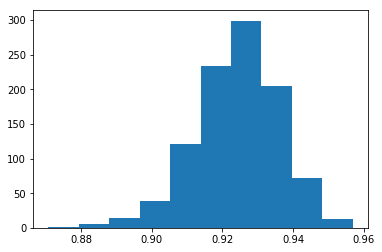

95.0 confidence interval 89.9% and 94.5%


In [42]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(df_orig) * 1)    # size of a bootstrap sample
df_z = df_orig.apply(zscore)
y = df_z[['strength']]
X = df_z.drop(labels= "strength" , axis = 1)
concrete_XY = X.join(y)
values = concrete_XY.values
# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fitting model with best parameters obtained using GridSearchCV
	gbr = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 6, max_features= 0.3, min_samples_leaf= 5, n_estimators= 1000)  
	gbr.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	gbr.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbr.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbr.score(test[:, :-1] , y_test)

	stats.append(score)

# For plotting the 95% confidence interval
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))